<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Operaciones lógicas y máscaras </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/openCV.jpg" align="middle" style="width:550px;"/></td>
<td>

**OpenCV** es una biblioteca libre desarrollada originalmente por Intel. Vio la luz en el año 1999. Escrita originalmente en C/C++, su mejor virtud es que es multiplataforma, se puede ejecutar en diferentes sistemas operativos (Linux, Windows, Mac OS X, Android e iOS). También la podemos utilizar en diferentes lenguajes de programación como Java, Objective C, C# y *Python*.

Quizás sea la biblioteca de visión artificial más importante y más usada. Es utilizada por universidades, empresas y gente del movimiento Maker para dar rienda suelta a su imaginación al tratarse de un software libre.

En este notebook comenzaremos con el tratamiento de imágenes en Python mediante esta librería, más específicamente vamos a ver como cargar o  leer una imagen, conversión a blanco y negro, filtros y otras operaciones que serán útiles dentro del curso.


   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# TAREA 

<div class="alert alert-success">
    
**Ejercicio 1**
    
 <ul>     
  <li>a) Generar imagenes como las que se muestran a continuación (300 x 300)</li>
  <li>b) Aplicar las operaciones de AND, OR y XOR</li>
   <li>b)Aplicar la operación inversa a ambas imagenes</li>     
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/circulo_triangulo.png">


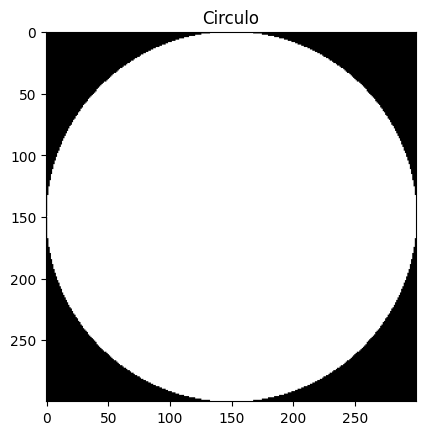

In [2]:
imagen_base_circulo =np.zeros( (300,300), dtype='uint8'  )
cv.circle(imagen_base_circulo, (150,150),150,255,-1)
plt.imshow(imagen_base_circulo,cmap='gray')
plt.title('Circulo')
plt.show()

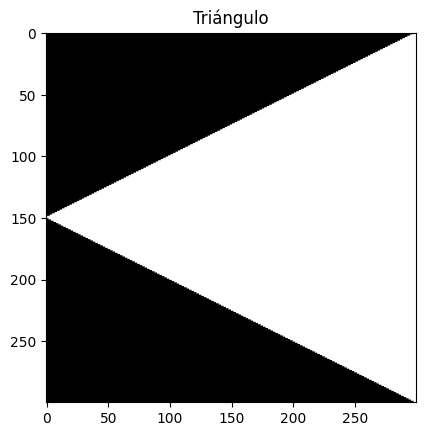

In [3]:
imagen_base_triangulo = np.zeros((300, 300), dtype='uint8')
vertices = np.array([[(0, 150), (300, 300), (300, 0)]], dtype=np.int32)
cv.fillPoly(imagen_base_triangulo, vertices, 255)
plt.imshow(imagen_base_triangulo, cmap='gray')
plt.title('Triángulo')
plt.show()

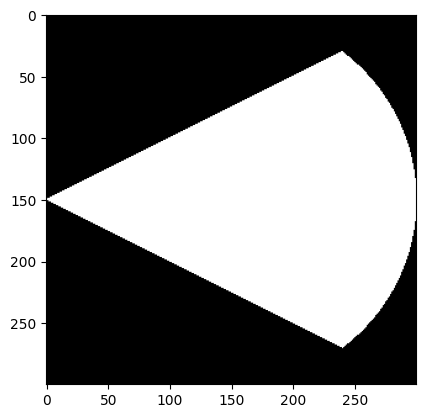

In [4]:
img_and = cv.bitwise_and(imagen_base_circulo,imagen_base_triangulo)
plt.imshow(img_and,cmap='gray')
plt.show()

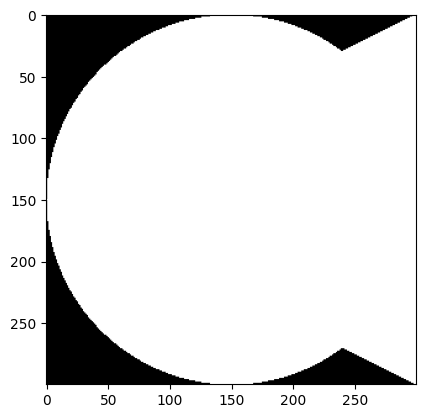

In [5]:
img_or = cv.bitwise_or(imagen_base_circulo,imagen_base_triangulo)
plt.imshow(img_or,cmap='gray')
plt.show()

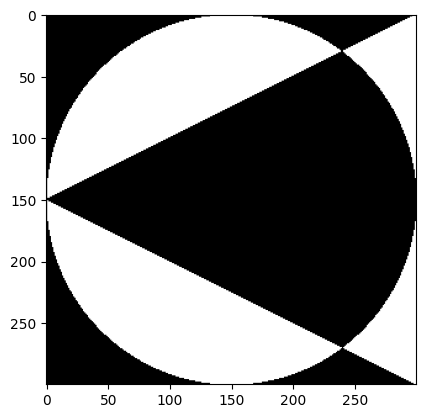

In [6]:
img_xor = cv.bitwise_xor(imagen_base_circulo,imagen_base_triangulo)
plt.imshow(img_xor,cmap='gray')
plt.show()

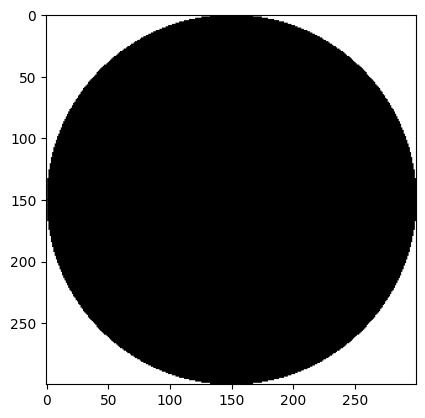

In [7]:
imagen_base_circulo_inv = cv.bitwise_not(imagen_base_circulo)
plt.imshow(imagen_base_circulo_inv,cmap='gray')
plt.show()

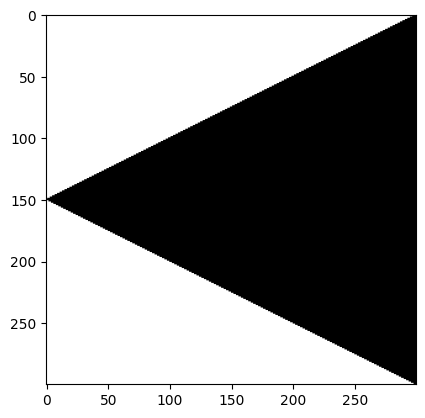

In [8]:
imagen_base_triangulo_inv = cv.bitwise_not(imagen_base_triangulo)
plt.imshow(imagen_base_triangulo_inv,cmap='gray')
plt.show()

<div class="alert alert-success">
    
**Ejercicio 2.  Descargar una imagen con el rostro de una persona**
    
   
 <ul>
  <li>a) Generar y aplicar una mascara con una circunferencia </li>
  <li>b) Generar y aplicar una mascara con un cuadrado</li>
</ul> 

</div>


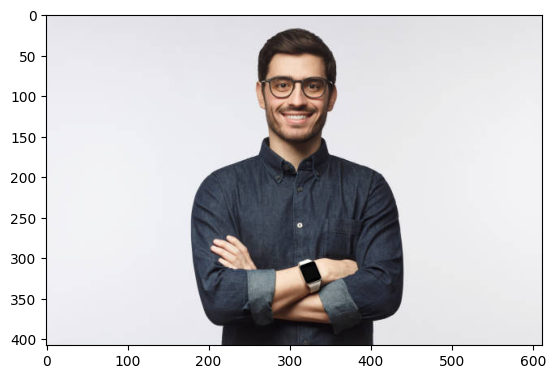

In [9]:
img = cv.imread('figuras/rostro.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

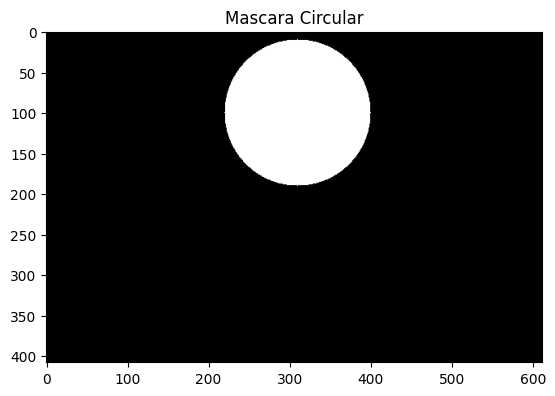

(408, 612, 3)

In [10]:
mask_circ = np.zeros(img.shape[:2], dtype=np.uint8)
cv.circle(mask_circ, (310, 100), 90, 255, -1)
plt.imshow(mask_circ, cmap='gray')
plt.title('Mascara Circular')
plt.show()
img.shape

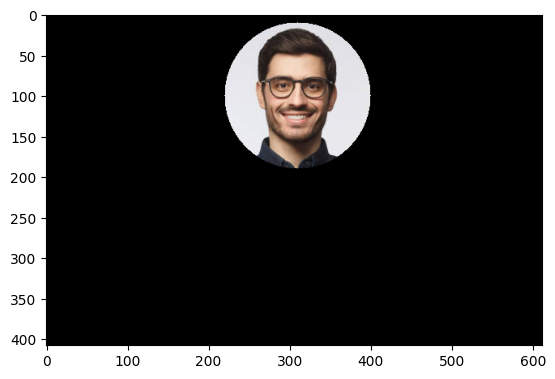

In [11]:
img_mascara_circular = cv.bitwise_and(  img, img , mask= mask_circ  )
plt.imshow(img_mascara_circular)
plt.show()

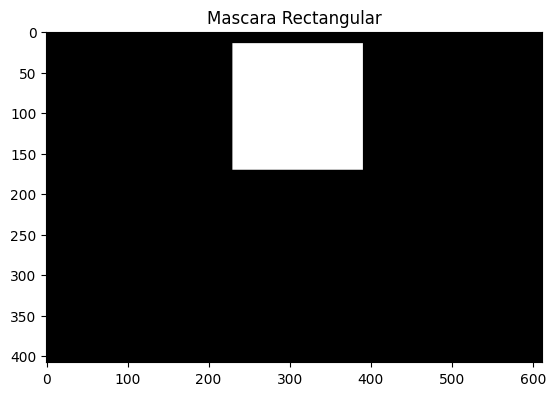

(408, 612, 3)

In [12]:
mask_rect = np.zeros(img.shape[:2], dtype=np.uint8)
cv.rectangle(mask_rect, (230,15), (390,170), 255, -1)
plt.imshow(mask_rect, cmap='gray')
plt.title('Mascara Rectangular')
plt.show()
img.shape

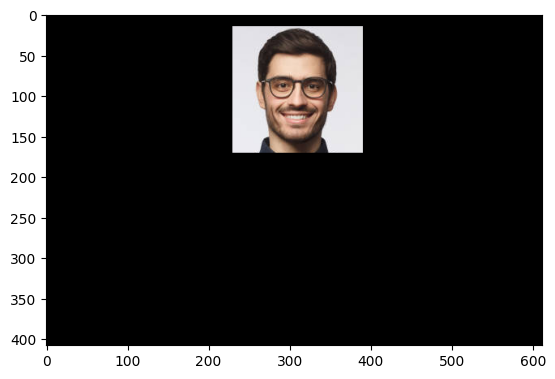

In [13]:
img_mascara_rectangular = cv.bitwise_and(  img, img , mask= mask_rect  )
plt.imshow(img_mascara_rectangular)
plt.show()

<div class="alert alert-success">
    
**Ejercicio 3**
    
   
 <ul>
  <li>a) Utilizando el archivo "figuras/ruido.jpg", aplicar todas las operaciones posibles para tratar de limpiar las letras de la figura del ruido existente, es decir tratar de que solo se vean las letras </li>
</ul> 

</div>
<img align="left" width="500"  float= "none" align="middle" src="figuras/ruido.jpg">

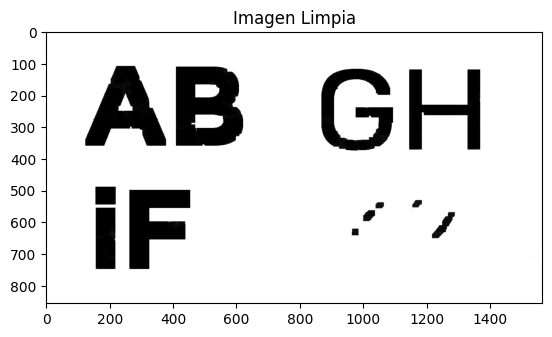

In [14]:
img = cv.imread('figuras/ruido.jpg')
img_gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_inv = cv.bitwise_not(img_gris)


kernel_vertical = cv.getStructuringElement(cv.MORPH_RECT, (1, 10))
img_vertical= cv.morphologyEx(img_inv, cv.MORPH_OPEN, kernel_vertical)
kernel_horizontal = cv.getStructuringElement(cv.MORPH_RECT, (10, 1))
img_horizontal = cv.morphologyEx(img_vertical, cv.MORPH_OPEN, kernel_horizontal)


img_dilatacion = cv.dilate(img_horizontal, None, iterations=5)
img_inv2 = cv.bitwise_not(img_dilatacion)

plt.imshow(img_inv2, cmap='gray')
plt.title('Imagen Limpia')
plt.show()

<div class="alert alert-success">
    
**Ejercicio 4**
    
   
 <ul>
  <li> Utilizar una imagen que tenga algún objeto en color azul y obtenga una nueva imagen en donde todo lo azul este a color y el resto en escala de grises   </li>
</ul> 

</div>


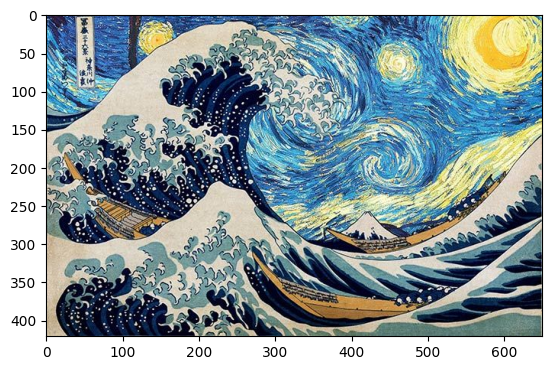

In [15]:
img = cv.imread('figuras/azul.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

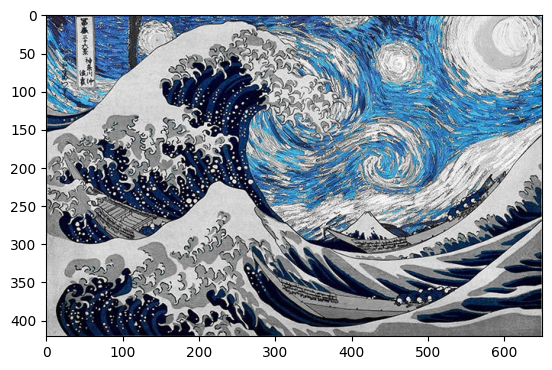

In [16]:
#(hMin = 94 , sMin = 126, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)

img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
inferior = np.array( [94,126,0] )
superior = np.array([ 179,255,255])
mascara=cv.inRange(img_hsv, inferior, superior)

img_gris = cv.cvtColor (img, cv.COLOR_RGB2GRAY)
img_gris_sub = cv.subtract(img_gris, mascara)
img_gris_sub_rgb = cv.cvtColor (img_gris_sub, cv.COLOR_GRAY2RGB)
img_mascara = cv.bitwise_and(img, img, mask=mascara)

img_add = cv.add(  img_gris_sub_rgb,  img_mascara )
plt.imshow(img_add)
plt.show()